In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import scipy
from skimage import io, color
from skimage import exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [2]:
lookup_gesture = dict()
reverselookup_gesture = dict()
lookup_seq = dict()
reverselookup_seq = dict()
count = 0
count_seq = 0
for i in range(0, 13):
    for j in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # If running this code locally, this is to ensure you aren't reading in hidden folders
                for k in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+
                                    '/sequences/' + j + '/' + 'train' + '/'):
                    for l in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+
                                    '/sequences/' + j + '/' + 'train' + '/' + k + '/'):
                        lookup_seq[j] = count_seq
                        reverselookup_seq[count_seq] = j
                        count_seq = count_seq +1
count_seq

71590

In [3]:
x_train = []
y_train = []
final_img_count_train = 0
seq_img_count  = 0
ges_img_count = 0
sub_img_count = 0
img_count = 0
blended_img_count_train = 0
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
for i in range(0, 13): # select 13 subject areas
    ges_img_count = 0
    for j in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # Again avoid hidden folders
            seq_img_count = 0 # To tally images of a given gesture
            for k in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'
                                  + j + '/' + 'train' + '/'):
                blended_image = Image.new('L',(320,120))
                if not k.startswith('.'): # Again avoid hidden folders
                    img_count = 0
                    for l in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'
                                          + j + '/' + 'train' + '/' + k + '/'):
                        img = Image.open('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'
                                          + j + '/' + 'train' + '/' + k + '/' + l).convert('L')
                        # Read in and convert to greyscale
                        img = img.resize((320, 120))
                        if img_count == 0:
                            blended_image.paste(img)
                        else: 
                            blended_image = Image.blend(blended_image, img, 0.1)
                        img_count = img_count + 1
                    y_values = j
                    y_train.append(y_values)
                    image_sharpen = scipy.signal.convolve2d(blended_image, kernel, 'same')
                    arr = np.array(image_sharpen)
                    blended_img_count_train = blended_img_count_train + 1
                    x_train.append(arr) 
                    seq_img_count = seq_img_count + img_count
            ges_img_count = ges_img_count + seq_img_count
            #print("ges_img_count",ges_img_count)
    sub_img_count = sub_img_count + ges_img_count
    #print("sub_img_count",sub_img_count)
final_img_count_train = final_img_count_train + sub_img_count        
print("Final Image Count Train: ",final_img_count_train)
print("Blended Image Count Train",blended_img_count_train)
x_train = np.array(x_train, dtype = 'float32')
y_train = np.array(y_train)

Final Image Count Train:  71590
Blended Image Count Train 4036


In [4]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
print(y_train)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [5]:
#import keras
#from keras.utils import to_categorical
#y_train = to_categorical(y_train,dtype='<U8')

In [7]:
print(x_train.shape)
print(y_train.shape)
x_train.shape[1:]

(4036, 120, 320)
(4036, 11)


(120, 320)

In [8]:
x_test = []
y_test = []
final_img_count_test = 0
seq_img_count  = 0
ges_img_count = 0
sub_img_count = 0
img_count = 0
blended_img_count_test = 0
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
for i in range(0, 13): # select 13 subject areas
    ges_img_count = 0
    for j in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # Again avoid hidden folders
            seq_img_count = 0 # To tally images of a given gesture
            for k in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'
                                + j + '/' + 'test' + '/'):
                if not k.startswith('.'): # Again avoid hidden folders
                    img_count = 0
                    for l in os.listdir('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'
                                        + j + '/' + 'test' + '/' + k + '/'):
                        img = Image.open('C:/B.9 Applied Machine Learning/Project/leaphandgestuav/0'+str(i)+'/sequences/'
                                          + j + '/' + 'test' + '/' + k + '/' + l).convert('L')
                        # Read in and convert to greyscale
                        # Read in and convert to greyscale
                        img = img.resize((320, 120))
                        if img_count == 0:
                            blended_image.paste(img)
                        else: 
                            blended_image = Image.blend(blended_image, img, 0.5)
                        img_count = img_count + 1
                    y_values = j
                    y_test.append(y_values)
                    image_sharpen = scipy.signal.convolve2d(blended_image, kernel, 'same')
                    arr = np.array(image_sharpen)
                    blended_img_count_test = blended_img_count_test + 1
                    x_test.append(arr) 
                    seq_img_count = seq_img_count + img_count
            ges_img_count = ges_img_count + seq_img_count
            #print("ges_img_count",ges_img_count)
    sub_img_count = sub_img_count + ges_img_count
    #print("sub_img_count",sub_img_count)
final_img_count_test = final_img_count_test + sub_img_count        
print("Final Image Count Test: ",final_img_count_test)
print("Blended Image Count Test: ",blended_img_count_test)
x_test = np.array(x_test, dtype = 'float32')
y_test = np.array(y_test)

Final Image Count Test:  17784
Blended Image Count Test:  995


In [9]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_test = encoder.fit_transform(y_test)
print(y_test)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


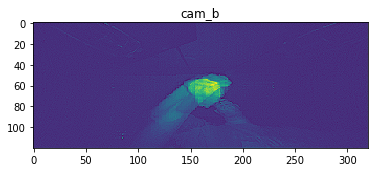

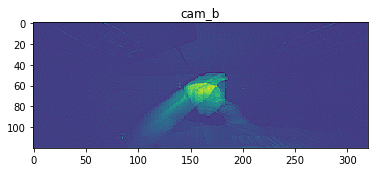

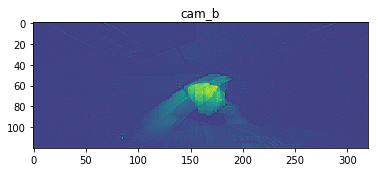

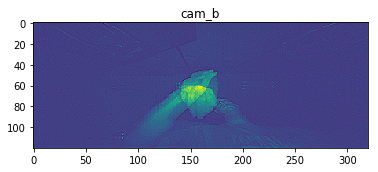

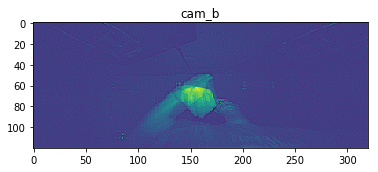

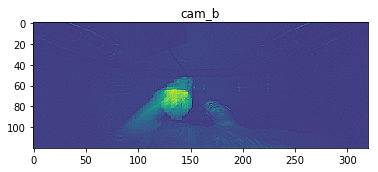

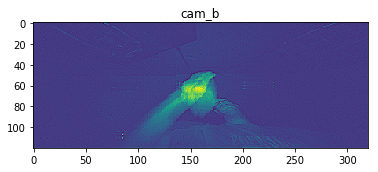

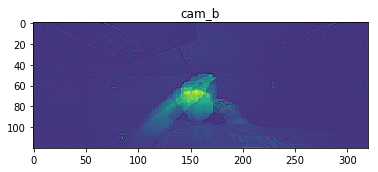

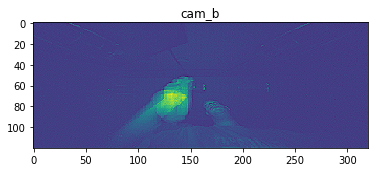

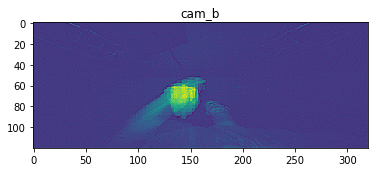

In [10]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_train[i])
    plt.title(reverselookup_seq[i])
    plt.show()

In [11]:
x_train = x_train.reshape((blended_img_count_train, 120, 320, 1))
x_train /= 255
x_test = x_test.reshape((blended_img_count_test,120,320,1))
x_test /= 255
x_train.shape

(4036, 120, 320, 1)

In [12]:
from sklearn.model_selection import train_test_split
x_validate,x_test_1,y_validate,y_test_1 = train_test_split(x_test,y_test,test_size = 0.5)

In [13]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=(4,4), strides=(1,1) , activation='relu',input_shape = (120,320,1)))
model.add(MaxPooling2D (pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), strides=(1,1) , activation='relu'))
model.add(Flatten())
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 117, 317, 64)      1088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 158, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 154, 64)       102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 532224)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                5854475   
_________________________________________________________________
dense_2 (Dense)              (None, 11)                132       
Total params: 5,958,159
Trainable params: 5,958,159
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
epochs = 5
batch_size = 64
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/5
4036/4036 [==============================] - 611s 151ms/step - loss: 0.2838 - acc: 0.9103
Epoch 2/5
4036/4036 [==============================] - 608s 151ms/step - loss: 0.2256 - acc: 0.9247
Epoch 3/5
4036/4036 [==============================] - 603s 149ms/step - loss: 0.1799 - acc: 0.9398
Epoch 4/5
4036/4036 [==============================] - 604s 150ms/step - loss: 0.1388 - acc: 0.9535
Epoch 5/5
4036/4036 [==============================] - 620s 154ms/step - loss: 0.1234 - acc: 0.9585


In [16]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc) + ":" + "Loss:" + str(loss))

995/995 [==============================] - 55s 56ms/step
Accuracy:0.9335769871970517:Loss:0.23525911674427627
